<h1> Git lfs guide </h1>
https://docs.github.com/en/repositories/working-with-files/managing-large-files/installing-git-large-file-storage <br>

Command for lsf when installed -> git lfs track ".csv"

Ollama without sudo <br>
https://github.com/ollama/ollama/issues/2111 <br>

When in hpc: <br>
go to github.com/ollama/ollama <br>
Find relases and locate file called ollama-linux-amd64 (or another model) <br>
in folder where file is installed run: <br>
chmod +x ollama-* <br>
./filename serve& (./ollama-linux-amd64) <br>
./filename run llama2 (./ollama-linux-amd64 run llama2)

In [ ]:
install = False # Set to True to install the required packages
if install:
   !pip install numpy
   !pip install pandas
   !pip install chess
   !pip install fentoboardimage
   !pip install matplotlib
   !pip install ollama

<h1> File for testing different prompting styles </h1>

<h2> Importing packages and reading data </h2>

In [1]:
# Importing all relevant and necessary modules
import numpy as np 
import pandas as pd 
import os
import chess
import math
import ollama
import matplotlib.pyplot as plt

<h2> Testing different prompting styles </h2>

![diagrams\prompt_test_diagrams2.png](diagrams\prompt_test_diagrams2.png)

<h1> Function descriptions </h1>

<strong> init_prompt_test: </strong> Managing function handling the initilisation of the prompt test. <br> Inputs: prompt_list: A list of prompt codes to be tested <br> df: dataframe containing the fen positions <br> n_test: amount of fen positions to be evaluated <br> color: What color is the model playing as <br> Outputs: tuple containg n_test and a list of how many prompts resulted in legal moves <br> <br> <strong> gen_prompts: </strong> A managing function converting the list of prompt codes into prompts on the correct format <br> Inputs: <br> prompt_list: A list of prompt codes to be tested  <br> fen: current fen position of the board <br> color: color the model is playing as <br> output: A list of prompts to be tested <br> <br> <strong>

gen_prompt1 & gen_prompt2: Functions converting prompt codes into prompts to be parsed to the model</strong> <br> Inputs:<br> board : current chess board object <br>n: amount of models in current network <br> Output: prompt as a string <br> <br>
<strong>gen_legal_moves: Function that generates a list of all legal moves from chess board object </strong> <br> Inputs: <br> board: Current chess board object <br> frac: a float between 0 and 1 controlling the amount of moves to return <br> Output: a list of legal moves <br> <br>
 <strong>prompt move: </strong> <br> Inputs: <br> || <br> Output: <br> <br>
<strong>test_prompt </strong> <br> Inputs: <br> || <br> Output: <br> <br> <strong>output_handler:</strong> <br> Inputs: <br> || <br> Output: <br> <br> <strong>gen_histograms:</strong> <br> Inputs: <br> || <br> Output: <br> <br> <strong>gen_histogram</strong> <br> Inputs: <br> || <br> Output: <br> <br>

In [4]:

def init_prompt_test(prompt_list,df,n_test,color):
    results = np.zeros(len(prompt_list))
    for i in range(n_test):
        prompts = gen_prompts(prompt_list,df['FEN'][i],color)
        result = test_prompt(prompts,chess.Board(df['FEN'][i]))
        results += result
    results = (n_test,results)
    output_handler(results)

def gen_prompts(prompt_list,fen,color):
    prompts = []
    board = chess.Board(fen)

    for prompt in prompt_list: 
        if prompt[0] == 0:
            prompts.append(gen_prompt1(fen))
        else:
            prompts.append( gen_prompt2( fen, gen_legal_moves(board,prompt[1]) )   )
    return prompts

def gen_prompt1(board, n=10):
    return f"You are playing chess and the board state is {board}.  You have to chose the best move to make next and provide the  What is your next move given in UCI notation?"

def gen_prompt2(board,moves, n=10):
    return f"You are playing chess and the board state is {board}. Here you are given a list of legal moves {moves}. You have to chose the best move to make next from the list of legal moves and provide the move exactly as they are given to you. What is your next move given in UCI notation?"
    
def gen_legal_moves(board,frac=1):
    legal_moves = board.legal_moves
    legal_moves = [str(move) for move in legal_moves]
    if frac == 1:
        return legal_moves
    else:
        return np.random.choice(legal_moves, math.floor(frac*len(legal_moves)), replace=False)

def prompt_move(prompt,board):
    response = ollama.chat(model='llama2:13b', messages=[
            {'role': 'user','content': prompt,},])
    move = response['message']['content']
    for k in range(len(move)):
        if move[k:k+4] in gen_legal_moves(board):
            move = move[k:k+4]
            break
    return move

def test_prompt(prompts,board):
    result = np.zeros(len(prompts))
    for i in range(len(prompts)):
        prompt = prompts[i]
        move = prompt_move(prompt,board)
        if move in  gen_legal_moves(board):
            result[i] = 1
    return result

def output_handler(results):
    print(results)
def gen_histograms(results):
    pass

    
    
def gen_histogram(total,results):
    pass


In [ ]:
df = pd.read_csv(r"chessData.csv")

In [62]:
prompt_list = [(0,0),(1,0.25),(1,0.5),(1,0.75),(1,1)]
color = 'white'
n_test = 1000
init_prompt_test(prompt_list,df,n_test,color)

(1000, array([  0., 961., 981., 974., 988.]))


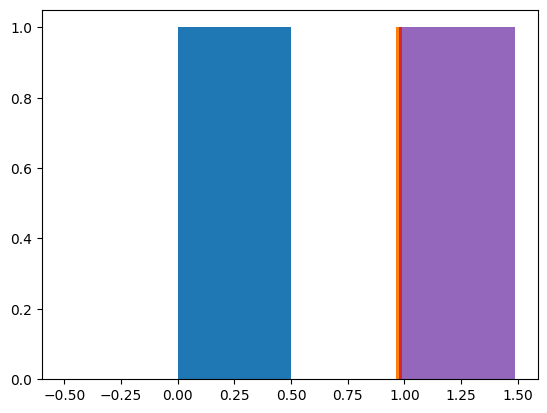

In [3]:
result1 = (1000, ([  0., 961., 981., 974., 988.]))
output_handler(result1)

<h1> Code for move evaluation </h1> <br> the following blocks of code will handle generating our primary moves, the code will play moves based on chess positions and output evaluations

<h2> Function defenitions </h2>

In [ ]:
def init_move_evaluator(network_sizes,df,endpoints,dir):
    results = []
    for network_size in network_sizes:
        for i in range(endpoints):
            pass
    return results
def prompt_network():
    pass
def prompt_network_moves():
    pass

